<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [3]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,07d08180-bdc0-495a-bdcb-ce289197e1db,Afriwin Sopyanto,https://play-lh.googleusercontent.com/a-/ACB-R...,Bukalapak tempat belanja terbaik karena setiap...,5,12,5.30.2,2023-03-03 09:43:54,None,NaT
1,99ac25bb-686c-4009-8edd-016279b23fbb,Agroprobiotik Jawa Barat,https://play-lh.googleusercontent.com/a-/ACB-R...,Sy kesulitan ingin komplen masalah pembayaran ...,2,265,5.27.2,2022-12-30 03:49:00,None,NaT
2,20fa8261-e6cc-41a2-85bc-a07498e2d4ca,Pujo Hartono,https://play-lh.googleusercontent.com/a-/ACB-R...,Sangat membantu dan mempermudah dlm berbelanja...,5,38,5.29.2,2023-02-27 14:00:43,None,NaT
3,c162506f-1395-419e-ae5b-48076e3349a0,Ryan Apriandi,https://play-lh.googleusercontent.com/a-/ACB-R...,"Aplikasi parah, saya belanja dengan CC pilih k...",1,307,5.27.3,2023-01-05 15:39:31,None,NaT
4,2d2d2703-fce4-47a9-bb36-bc0d3421002a,acep Suparman,https://play-lh.googleusercontent.com/a-/ACB-R...,Belanja di Bukalapak pembayaranya Bikin Ribet ...,1,0,5.30.2,2023-03-05 12:32:59,None,NaT


In [5]:
len(df_busu.index) #count the number of data we got

1300

In [6]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,Nurul Rizal,5,2020-10-21 16:11:43,Saya sangat terbantu dengan adanya bukalapak s...
1296,Pengguna Google,2,2018-10-25 07:10:32,Setelah update jadi berat untuk nampilin gamba...
1297,Pengguna Google,5,2019-03-18 10:23:37,sangat baik yg utama saya rasakan adalah kemud...
1298,Imam 367,5,2022-11-17 14:23:36,"Aplikasi bagus, cuma heran aja. Sering belanja..."
1299,Dadang Romansyah,5,2022-11-17 11:38:44,Sangat membantu utk berbelanja jadi gak perlu ...


In [7]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [8]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,Nurul Rizal,5,2020-10-21 16:11:43,Saya sangat terbantu dengan adanya bukalapak s...
1296,Pengguna Google,2,2018-10-25 07:10:32,Setelah update jadi berat untuk nampilin gamba...
1297,Pengguna Google,5,2019-03-18 10:23:37,sangat baik yg utama saya rasakan adalah kemud...
1298,Imam 367,5,2022-11-17 14:23:36,"Aplikasi bagus, cuma heran aja. Sering belanja..."
1299,Dadang Romansyah,5,2022-11-17 11:38:44,Sangat membantu utk berbelanja jadi gak perlu ...


In [9]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [10]:
import nltk

In [11]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [12]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Afriwin Sopyanto,5,2023-03-03 09:43:54,Bukalapak tempat belanja terbaik karena setiap...
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,Sy kesulitan ingin komplen masalah pembayaran ...
2,Pujo Hartono,5,2023-02-27 14:00:43,Sangat membantu dan mempermudah dlm berbelanja...
3,Ryan Apriandi,1,2023-01-05 15:39:31,"Aplikasi parah, saya belanja dengan CC pilih k..."
4,acep Suparman,1,2023-03-05 12:32:59,Belanja di Bukalapak pembayaranya Bikin Ribet ...


In [13]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [14]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [15]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [16]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [17]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [18]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [19]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Afriwin Sopyanto,5,2023-03-03 09:43:54,bukalapak tempat belanja terbaik karena setiap...,"[bukalapak, tempat, belanja, terbaik, karena, ..."
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba..."
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb..."
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p..."
4,acep Suparman,1,2023-03-05 12:32:59,belanja di bukalapak pembayaranya bikin ribet ...,"[belanja, di, bukalapak, pembayaranya, bikin, ..."
...,...,...,...,...,...
1295,Nurul Rizal,5,2020-10-21 16:11:43,saya sangat terbantu dengan adanya bukalapak s...,"[saya, sangat, terbantu, dengan, adanya, bukal..."
1296,Pengguna Google,2,2018-10-25 07:10:32,setelah update jadi berat untuk nampilin gamba...,"[setelah, update, jadi, berat, untuk, nampilin..."
1297,Pengguna Google,5,2019-03-18 10:23:37,sangat baik yg utama saya rasakan adalah kemud...,"[sangat, baik, yg, utama, saya, rasakan, adala..."
1298,Imam 367,5,2022-11-17 14:23:36,aplikasi bagus cuma heran aja sering belanja t...,"[aplikasi, bagus, cuma, heran, aja, sering, be..."


In [20]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [21]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
269,Khairan Yusuf,1,2023-03-06 18:27:04,kecewa ma bukalapakbayar gak pernah telatmalah...,"[kecewa, ma, bukalapakbayar, gak, pernah, tela..."
360,Rizky Johhana,2,2023-03-05 14:07:46,istri saya pas mau verifikasi email salah keti...,"[istri, saya, pas, mau, verifikasi, email, sal..."
336,Agustinus,3,2023-03-05 13:06:23,aplikasinya sudah bagus cuma untuk ongkos kiri...,"[aplikasinya, sudah, bagus, cuma, untuk, ongko..."
705,Relbi Azoni,5,2023-03-05 12:57:03,banyak promo menarik dan cepat dalam proses,"[banyak, promo, menarik, dan, cepat, dalam, pr..."
4,acep Suparman,1,2023-03-05 12:32:59,belanja di bukalapak pembayaranya bikin ribet ...,"[belanja, di, bukalapak, pembayaranya, bikin, ..."


In [22]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [23]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(dan, 3), (yg, 3), (bukalapak, 2), (setiap, 2...
1    [(ingin, 3), (komplen, 3), (sy, 2), (pembayara...
2    [(dan, 2), (di, 2), (bayar, 2), (sangat, 1), (...
3    [(di, 3), (saya, 2), (belanja, 2), (cicilan, 2...
4    [(di, 2), (yg, 2), (belanja, 1), (bukalapak, 1...
Name: Ulasan_tokenize, dtype: object


In [24]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [bukalapak, tempat, belanja, terbaik, karena, ...
1       [sy, kesulitan, ingin, komplen, masalah, pemba...
2       [sangat, membantu, dan, mempermudah, dlm, berb...
3       [aplikasi, parah, saya, belanja, dengan, cc, p...
4       [belanja, di, bukalapak, pembayaranya, bikin, ...
                              ...                        
1295    [saya, sangat, terbantu, dengan, adanya, bukal...
1296    [setelah, update, jadi, berat, untuk, nampilin...
1297    [sangat, baik, yg, utama, saya, rasakan, adala...
1298    [aplikasi, bagus, cuma, heran, aja, sering, be...
1299    [sangat, membantu, utk, berbelanja, jadi, gak,...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [25]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [26]:
normalizad_word = pd.read_csv("/content/slangwords.txt")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [27]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [28]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,Afriwin Sopyanto,5,2023-03-03 09:43:54,bukalapak tempat belanja terbaik karena setiap...,"[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, tempat, belanja, terbaik, karena, ..."
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, ingin, komplen, masalah, pemba..."
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dlm, berb..."
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p..."
4,acep Suparman,1,2023-03-05 12:32:59,belanja di bukalapak pembayaranya bikin ribet ...,"[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, di, bukalapak, pembayaranya, bikin, ..."
...,...,...,...,...,...,...
1295,Nurul Rizal,5,2020-10-21 16:11:43,saya sangat terbantu dengan adanya bukalapak s...,"[saya, sangat, terbantu, dengan, adanya, bukal...","[saya, sangat, terbantu, dengan, adanya, bukal..."
1296,Pengguna Google,2,2018-10-25 07:10:32,setelah update jadi berat untuk nampilin gamba...,"[setelah, update, jadi, berat, untuk, nampilin...","[setelah, update, jadi, berat, untuk, nampilin..."
1297,Pengguna Google,5,2019-03-18 10:23:37,sangat baik yg utama saya rasakan adalah kemud...,"[sangat, baik, yg, utama, saya, rasakan, adala...","[sangat, baik, yg, utama, saya, rasakan, adala..."
1298,Imam 367,5,2022-11-17 14:23:36,aplikasi bagus cuma heran aja sering belanja t...,"[aplikasi, bagus, cuma, heran, aja, sering, be...","[aplikasi, bagus, cuma, heran, aja, sering, be..."


In [29]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [bukalapak, tempat, belanja, terbaik, karena, ...
1       [sy, kesulitan, ingin, komplen, masalah, pemba...
2       [sangat, membantu, dan, mempermudah, dlm, berb...
3       [aplikasi, parah, saya, belanja, dengan, cc, p...
4       [belanja, di, bukalapak, pembayaranya, bikin, ...
                              ...                        
1295    [saya, sangat, terbantu, dengan, adanya, bukal...
1296    [setelah, update, jadi, berat, untuk, nampilin...
1297    [sangat, baik, yg, utama, saya, rasakan, adala...
1298    [aplikasi, bagus, cuma, heran, aja, sering, be...
1299    [sangat, membantu, utk, berbelanja, jadi, tida...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [30]:
from nltk.corpus import stopwords

In [31]:
list_stopwords = stopwords.words('indonesian')

In [32]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [33]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,Afriwin Sopyanto,5,2023-03-03 09:43:54,bukalapak tempat belanja terbaik karena setiap...,"[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, belanja, terbaik, pembelian, pemba..."
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, komplen, pembayaran, paylater,..."
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dlm, berb...","[membantu, mempermudah, dlm, berbelanjatp, tol..."
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
4,acep Suparman,1,2023-03-05 12:32:59,belanja di bukalapak pembayaranya bikin ribet ...,"[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, bukalapak, pembayaranya, bikin, ribe..."
...,...,...,...,...,...,...,...
1295,Nurul Rizal,5,2020-10-21 16:11:43,saya sangat terbantu dengan adanya bukalapak s...,"[saya, sangat, terbantu, dengan, adanya, bukal...","[saya, sangat, terbantu, dengan, adanya, bukal...","[terbantu, bukalapak, mudah, berbelanja, mudah..."
1296,Pengguna Google,2,2018-10-25 07:10:32,setelah update jadi berat untuk nampilin gamba...,"[setelah, update, jadi, berat, untuk, nampilin...","[setelah, update, jadi, berat, untuk, nampilin...","[update, berat, nampilin, gambar, produk, klik..."
1297,Pengguna Google,5,2019-03-18 10:23:37,sangat baik yg utama saya rasakan adalah kemud...,"[sangat, baik, yg, utama, saya, rasakan, adala...","[sangat, baik, yg, utama, saya, rasakan, adala...","[yg, utama, rasakan, kemudahan, bantuan, yg, p..."
1298,Imam 367,5,2022-11-17 14:23:36,aplikasi bagus cuma heran aja sering belanja t...,"[aplikasi, bagus, cuma, heran, aja, sering, be...","[aplikasi, bagus, cuma, heran, aja, sering, be...","[aplikasi, bagus, heran, aja, belanja, ga, dap..."


In [34]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 11.1 MB/s eta 0:00:00


In [35]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.5 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=5b0982b5ca6bc5ab1fc637f4b7ef3154ede47851239034381b4c0f9b46c2492f
  Stored in directory: /root/.cache/pip/wheels/08/66/b4/921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [36]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4906
------------------------
bukalapak : bukalapak
belanja : belanja
terbaik : baik
pembelian : beli
pembayaran : bayar
angsuran : angsur
dilengkapi : lengkap
informasi : informasi
yg : yg
detail : detail
fitur : fitur
membantu : bantu
mempermudah : mudah
pengguna : guna
promo : promo
menarik : tarik
nggak : nggak
kalah : kalah
aplikasi : aplikasi
sejenis : jenis
terimakasih : terimakasih
sy : sy
kesulitan : sulit
komplen : komplen
paylater : paylater
no : no
watelpon : watelpon
susah : susah
aktif : aktif
membingunkan : membingunkan
masuk : masuk
dlm : dlm
berbelanjatp : berbelanjatp
tolong : tolong
pembayarannya : bayar
produk : produk
lbh : lbh
permudah : mudah
pembeli : beli
bebas : bebas
bayar : bayar
persulit : sulit
contohhanya : contohhanya
berlaku : laku
pake : pake
dana : dana
apalah : apa
gt : gt
banyakin : banyakin
diskon : diskon
ongkir : ongkir
nya : nya
jg : jg
parah : parah
cc : cc
pilih : pilih
klik : klik
cicilan : cicil
tertagih : tagih
full : full
confirmasi : conf

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [37]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [38]:
name_dataframe.to_excel("tokped_text.xlsx")

In [39]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [40]:
tokenize_ulasan = word_tokenize(ulasan)

In [41]:
tokenize_ulasan

['bukalapak',
 'belanja',
 'baik',
 'beli',
 'bayar',
 'angsur',
 'lengkap',
 'informasi',
 'yg',
 'detail',
 'fitur',
 'yg',
 'bantu',
 'mudah',
 'guna',
 'promo',
 'tarik',
 'yg',
 'nggak',
 'kalah',
 'aplikasi',
 'jenis',
 'terimakasih',
 'bukalapak',
 'sy',
 'sulit',
 'komplen',
 'bayar',
 'paylater',
 'no',
 'watelpon',
 'susah',
 'aktif',
 'membingunkan',
 'komplen',
 'sy',
 'komplen',
 'paylater',
 'bayar',
 'masuk',
 'bantu',
 'mudah',
 'dlm',
 'berbelanjatp',
 'tolong',
 'bayar',
 'produk',
 'lbh',
 'mudah',
 'beli',
 'bebas',
 'bayar',
 'sulit',
 'contohhanya',
 'laku',
 'bayar',
 'pake',
 'aplikasi',
 'dana',
 'apa',
 'gt',
 'banyakin',
 'diskon',
 'ongkir',
 'nya',
 'jg',
 'aplikasi',
 'parah',
 'belanja',
 'cc',
 'pilih',
 'klik',
 'cicil',
 'tagih',
 'full',
 'confirmasi',
 'urus',
 'temen',
 'belanja',
 'metode',
 'cicil',
 'yg',
 'korban',
 'kabar',
 'bukalapak',
 'belanja',
 'bukalapak',
 'pembayaranya',
 'bikin',
 'ribet',
 'engga',
 'aplikasi',
 'yg',
 'lainyasangat'

In [42]:
fqdist = FreqDist(tokenize_ulasan)

In [43]:
fqdist

FreqDist({'bukalapak': 563, 'yg': 441, 'aplikasi': 433, 'nya': 380, 'barang': 375, 'bayar': 280, 'ga': 262, 'buka': 237, 'beli': 229, 'belanja': 225, ...})

In [44]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 563),
 ('yg', 441),
 ('aplikasi', 433),
 ('nya', 380),
 ('barang', 375),
 ('bayar', 280),
 ('ga', 262),
 ('buka', 237),
 ('beli', 229),
 ('belanja', 225),
 ('kirim', 215),
 ('lapak', 196),
 ('transaksi', 190),
 ('aja', 185),
 ('jual', 184)]

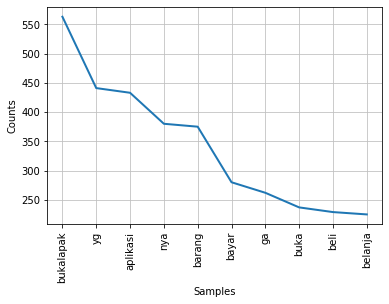

In [45]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [46]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Afriwin Sopyanto,5,2023-03-03 09:43:54,bukalapak tempat belanja terbaik karena setiap...,"[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, belanja, terbaik, pembelian, pemba...","[bukalapak, belanja, baik, beli, bayar, angsur...",bukalapak belanja baik beli bayar angsur lengk...,1
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, komplen, pembayaran, paylater,...","[sy, sulit, komplen, bayar, paylater, no, wate...",sy sulit komplen bayar paylater no watelpon su...,0
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dlm, berb...","[membantu, mempermudah, dlm, berbelanjatp, tol...","[bantu, mudah, dlm, berbelanjatp, tolong, baya...",bantu mudah dlm berbelanjatp tolong bayar prod...,1
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
4,acep Suparman,1,2023-03-05 12:32:59,belanja di bukalapak pembayaranya bikin ribet ...,"[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, bukalapak, pembayaranya, bikin, ribe...","[belanja, bukalapak, pembayaranya, bikin, ribe...",belanja bukalapak pembayaranya bikin ribet eng...,0
...,...,...,...,...,...,...,...,...,...,...
1295,Nurul Rizal,5,2020-10-21 16:11:43,saya sangat terbantu dengan adanya bukalapak s...,"[saya, sangat, terbantu, dengan, adanya, bukal...","[saya, sangat, terbantu, dengan, adanya, bukal...","[terbantu, bukalapak, mudah, berbelanja, mudah...","[bantu, bukalapak, mudah, belanja, mudah, beli...",bantu bukalapak mudah belanja mudah beli paket...,1
1296,Pengguna Google,2,2018-10-25 07:10:32,setelah update jadi berat untuk nampilin gamba...,"[setelah, update, jadi, berat, untuk, nampilin...","[setelah, update, jadi, berat, untuk, nampilin...","[update, berat, nampilin, gambar, produk, klik...","[update, berat, nampilin, gambar, produk, klik...",update berat nampilin gambar produk klik cari ...,0
1297,Pengguna Google,5,2019-03-18 10:23:37,sangat baik yg utama saya rasakan adalah kemud...,"[sangat, baik, yg, utama, saya, rasakan, adala...","[sangat, baik, yg, utama, saya, rasakan, adala...","[yg, utama, rasakan, kemudahan, bantuan, yg, p...","[yg, utama, rasa, mudah, bantu, yg, puaskanpen...",yg utama rasa mudah bantu yg puaskanpengunaan ...,1
1298,Imam 367,5,2022-11-17 14:23:36,aplikasi bagus cuma heran aja sering belanja t...,"[aplikasi, bagus, cuma, heran, aja, sering, be...","[aplikasi, bagus, cuma, heran, aja, sering, be...","[aplikasi, bagus, heran, aja, belanja, ga, dap...","[aplikasi, bagus, heran, aja, belanja, ga, dap...",aplikasi bagus heran aja belanja ga dapet grat...,1


In [47]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [48]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Afriwin Sopyanto,5,2023-03-03 09:43:54,bukalapak tempat belanja terbaik karena setiap...,"[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, belanja, terbaik, pembelian, pemba...","[bukalapak, belanja, baik, beli, bayar, angsur...",bukalapak belanja baik beli bayar angsur lengk...,1
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, komplen, pembayaran, paylater,...","[sy, sulit, komplen, bayar, paylater, no, wate...",sy sulit komplen bayar paylater no watelpon su...,0
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dlm, berb...","[membantu, mempermudah, dlm, berbelanjatp, tol...","[bantu, mudah, dlm, berbelanjatp, tolong, baya...",bantu mudah dlm berbelanjatp tolong bayar prod...,1
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
4,acep Suparman,1,2023-03-05 12:32:59,belanja di bukalapak pembayaranya bikin ribet ...,"[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, bukalapak, pembayaranya, bikin, ribe...","[belanja, bukalapak, pembayaranya, bikin, ribe...",belanja bukalapak pembayaranya bikin ribet eng...,0


In [49]:
from textblob import TextBlob


In [50]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [51]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Afriwin Sopyanto,5,2023-03-03 09:43:54,bukalapak tempat belanja terbaik karena setiap...,"[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, belanja, terbaik, pembelian, pemba...","[bukalapak, belanja, baik, beli, bayar, angsur...",bukalapak belanja baik beli bayar angsur lengk...,1,0.00,0.00,Neutral
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, komplen, pembayaran, paylater,...","[sy, sulit, komplen, bayar, paylater, no, wate...",sy sulit komplen bayar paylater no watelpon su...,0,0.00,0.00,Neutral
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dlm, berb...","[membantu, mempermudah, dlm, berbelanjatp, tol...","[bantu, mudah, dlm, berbelanjatp, tolong, baya...",bantu mudah dlm berbelanjatp tolong bayar prod...,1,0.00,0.00,Neutral
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.35,0.55,Positive
4,acep Suparman,1,2023-03-05 12:32:59,belanja di bukalapak pembayaranya bikin ribet ...,"[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, bukalapak, pembayaranya, bikin, ribe...","[belanja, bukalapak, pembayaranya, bikin, ribe...",belanja bukalapak pembayaranya bikin ribet eng...,0,0.00,0.00,Neutral


In [52]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Afriwin Sopyanto,5,2023-03-03 09:43:54,bukalapak tempat belanja terbaik karena setiap...,"[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, tempat, belanja, terbaik, karena, ...","[bukalapak, belanja, terbaik, pembelian, pemba...","[bukalapak, belanja, baik, beli, bayar, angsur...",bukalapak belanja baik beli bayar angsur lengk...,1,0.00,0.00,Neutral
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, ingin, komplen, masalah, pemba...","[sy, kesulitan, komplen, pembayaran, paylater,...","[sy, sulit, komplen, bayar, paylater, no, wate...",sy sulit komplen bayar paylater no watelpon su...,0,0.00,0.00,Neutral
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dlm, berb...","[membantu, mempermudah, dlm, berbelanjatp, tol...","[bantu, mudah, dlm, berbelanjatp, tolong, baya...",bantu mudah dlm berbelanjatp tolong bayar prod...,1,0.00,0.00,Neutral
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.35,0.55,Positive
4,acep Suparman,1,2023-03-05 12:32:59,belanja di bukalapak pembayaranya bikin ribet ...,"[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, di, bukalapak, pembayaranya, bikin, ...","[belanja, bukalapak, pembayaranya, bikin, ribe...","[belanja, bukalapak, pembayaranya, bikin, ribe...",belanja bukalapak pembayaranya bikin ribet eng...,0,0.00,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Nurul Rizal,5,2020-10-21 16:11:43,saya sangat terbantu dengan adanya bukalapak s...,"[saya, sangat, terbantu, dengan, adanya, bukal...","[saya, sangat, terbantu, dengan, adanya, bukal...","[terbantu, bukalapak, mudah, berbelanja, mudah...","[bantu, bukalapak, mudah, belanja, mudah, beli...",bantu bukalapak mudah belanja mudah beli paket...,1,0.00,0.00,Neutral
1296,Pengguna Google,2,2018-10-25 07:10:32,setelah update jadi berat untuk nampilin gamba...,"[setelah, update, jadi, berat, untuk, nampilin...","[setelah, update, jadi, berat, untuk, nampilin...","[update, berat, nampilin, gambar, produk, klik...","[update, berat, nampilin, gambar, produk, klik...",update berat nampilin gambar produk klik cari ...,0,0.00,0.00,Neutral
1297,Pengguna Google,5,2019-03-18 10:23:37,sangat baik yg utama saya rasakan adalah kemud...,"[sangat, baik, yg, utama, saya, rasakan, adala...","[sangat, baik, yg, utama, saya, rasakan, adala...","[yg, utama, rasakan, kemudahan, bantuan, yg, p...","[yg, utama, rasa, mudah, bantu, yg, puaskanpen...",yg utama rasa mudah bantu yg puaskanpengunaan ...,1,0.00,0.00,Neutral
1298,Imam 367,5,2022-11-17 14:23:36,aplikasi bagus cuma heran aja sering belanja t...,"[aplikasi, bagus, cuma, heran, aja, sering, be...","[aplikasi, bagus, cuma, heran, aja, sering, be...","[aplikasi, bagus, heran, aja, belanja, ga, dap...","[aplikasi, bagus, heran, aja, belanja, ga, dap...",aplikasi bagus heran aja belanja ga dapet grat...,1,0.00,0.00,Neutral


In [53]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

Positive words


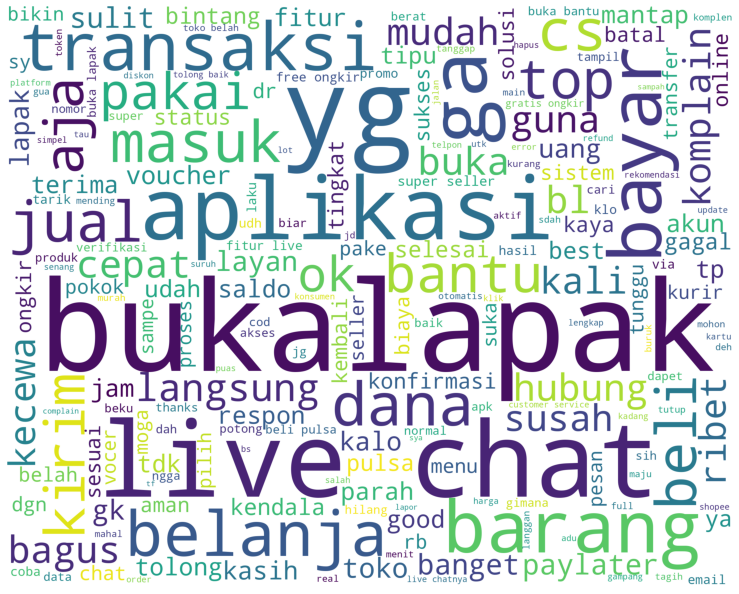

Negative words


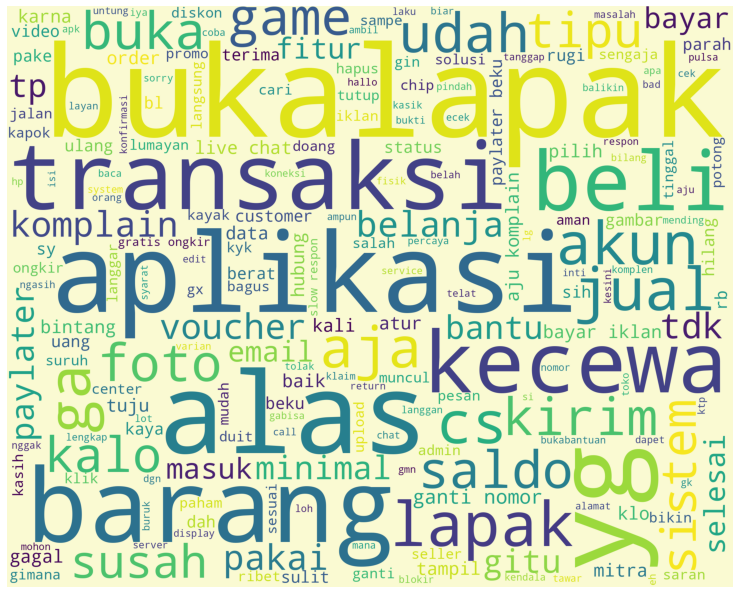

Neutral words


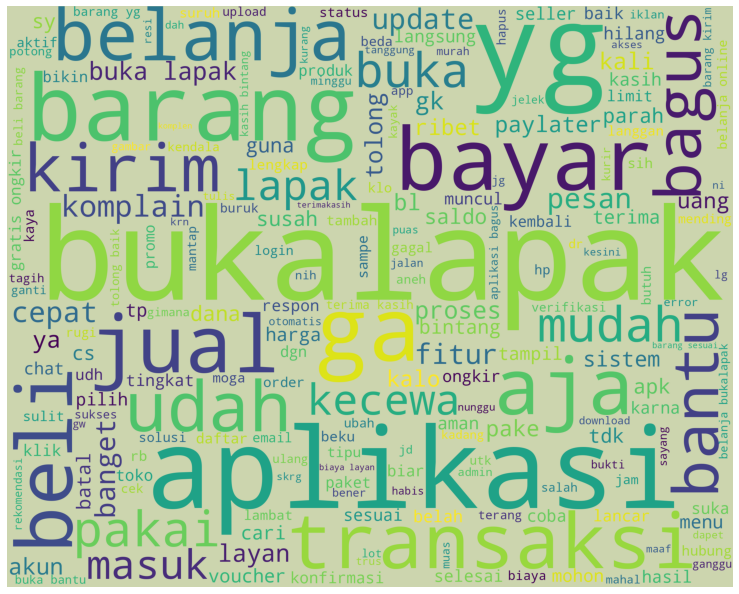

In [54]:
train_pos = name_dataframe[ name_dataframe['Sentiment'] == 'Positive']
train_pos = train_pos['Ulasan_clean']
train_neg = name_dataframe[ name_dataframe['Sentiment'] == 'Negative']
train_neg = train_neg['Ulasan_clean']
train_net = name_dataframe[ name_dataframe['Sentiment'] == 'Neutral']
train_net = train_net['Ulasan_clean']

def wordcloud_draw(data, color = '#FAFAD2'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and not word.startswith('nya')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_net,'#ccd5ae')

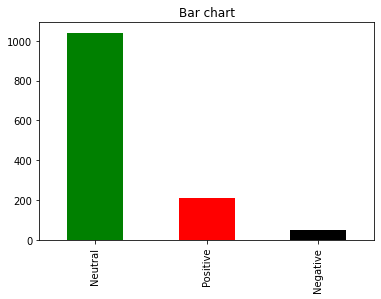

In [55]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [56]:
name_dataframe["Sentiment"].value_counts()

Neutral     1040
Positive     211
Negative      49
Name: Sentiment, dtype: int64

In [57]:
name_dataframe["Sentiment"].value_counts()

Neutral     1040
Positive     211
Negative      49
Name: Sentiment, dtype: int64

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [59]:
Ulasan = name_dataframe['Ulasan_clean']

In [60]:
Ulasan.isnull().sum()

0

In [61]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

4019


In [62]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'bukalapak': 599,
 'belanja': 378,
 'baik': 272,
 'beli': 383,
 'bayar': 345,
 'angsur': 150,
 'lengkap': 2005,
 'informasi': 1423,
 'yg': 4010,
 'detail': 874,
 'fitur': 1164,
 'bantu': 308,
 'mudah': 2318,
 'guna': 1288,
 'promo': 2916,
 'tarik': 3575,
 'nggak': 2429,
 'kalah': 1601,
 'aplikasi': 186,
 'jenis': 1534,
 'terimakasih': 3638,
 'sy': 3517,
 'sulit': 3495,
 'komplen': 1797,
 'paylater': 2688,
 'no': 2464,
 'watelpon': 3966,
 'susah': 3509,
 'aktif': 77,
 'membingunkan': 2203,
 'masuk': 2170,
 'dlm': 983,
 'berbelanjatp': 418,
 'tolong': 3752,
 'produk': 2904,
 'lbh': 1991,
 'bebas': 356,
 'contohhanya': 774,
 'laku': 1926,
 'pake': 2646,
 'dana': 819,
 'apa': 170,
 'gt': 1280,
 'banyakin': 313,
 'diskon': 963,
 'ongkir': 2571,
 'nya': 2503,
 'jg': 1535,
 'parah': 2663,
 'cc': 702,
 'pilih': 2827,
 'klik': 1757,
 'cicil': 744,
 'tagih': 3533,
 'full': 1182,
 'confirmasi': 769,
 'urus': 3892,
 'temen': 3609,
 'metode': 2252,
 'korban': 1826,
 'kabar': 1578,
 'pembayaranya':

In [63]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 150)	1
  (0, 186)	1
  (0, 272)	1
  (0, 308)	1
  (0, 345)	1
  (0, 378)	1
  (0, 383)	1
  (0, 599)	2
  (0, 874)	1
  (0, 1164)	1
  (0, 1288)	1
  (0, 1423)	1
  (0, 1534)	1
  (0, 1601)	1
  (0, 2005)	1
  (0, 2318)	1
  (0, 2429)	1
  (0, 2916)	1
  (0, 3575)	1
  (0, 3638)	1
  (0, 4010)	3
  (1, 77)	1
  (1, 345)	2
  (1, 1797)	3
  (1, 2170)	1
  :	:
  (1297, 2976)	1
  (1297, 3055)	1
  (1297, 3360)	1
  (1297, 3901)	1
  (1297, 4010)	3
  (1298, 51)	1
  (1298, 186)	1
  (1298, 227)	1
  (1298, 251)	1
  (1298, 378)	1
  (1298, 826)	1
  (1298, 1185)	1
  (1298, 1276)	1
  (1298, 1354)	1
  (1298, 2571)	1
  (1298, 2880)	1
  (1299, 308)	1
  (1299, 378)	1
  (1299, 583)	1
  (1299, 1630)	1
  (1299, 1719)	1
  (1299, 3032)	1
  (1299, 3633)	1
  (1299, 3903)	1
  (1299, 3955)	1


In [64]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

sy sulit komplen bayar paylater no watelpon susah aktif membingunkan komplen sy komplen paylater bayar masuk


In [65]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 77)	1
  (0, 345)	2
  (0, 1797)	3
  (0, 2170)	1
  (0, 2203)	1
  (0, 2464)	1
  (0, 2688)	2
  (0, 3495)	1
  (0, 3509)	1
  (0, 3517)	2
  (0, 3966)	1


In [66]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  6.56145057 6.78459412 ... 7.07227619 7.4777413  7.4777413 ]
  (0, 3966)	0.3057426156499125
  (0, 3517)	0.3516028812557412
  (0, 3509)	0.15341008525535166
  (0, 3495)	0.1784402289299186
  (0, 2688)	0.2984016975678892
  (0, 2464)	0.18756390549558113
  (0, 2203)	0.3057426156499125
  (0, 2170)	0.14538478317552803
  (0, 1797)	0.6288056110682327
  (0, 345)	0.23823996934393932
  (0, 77)	0.19112154207755197


In [67]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "Sentiment"]]

In [68]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-68-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [69]:
data_label.to_excel("data_label.xlsx")

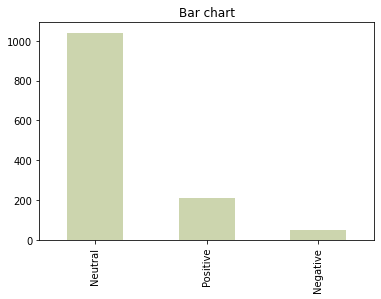

In [70]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

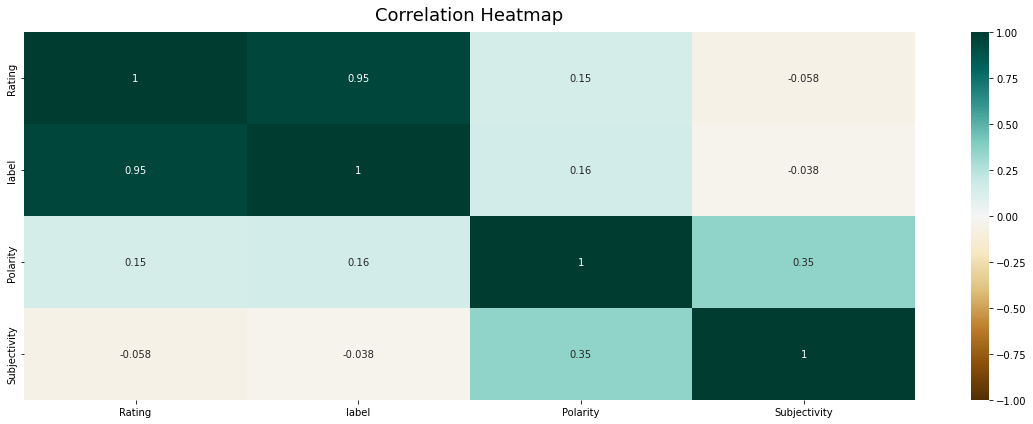

In [71]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [72]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label', 'Polarity', 'Subjectivity', 'Sentiment'],
      dtype='object')

In [73]:
from wordcloud import WordCloud

In [74]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [75]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-75-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [76]:
train_s0

,Nama pengguna,Ulasan_clean,Sentiment
8,Achenk Chonsleth,lumayan bagus minus sedia menu layan varian pr...,Negative
19,Endi irawan,beli barang nonfisik chip game inti barang yg ...,Negative
41,Nyon bae,aplikasi guna ganti nomor hp kirim foto ktp ga...,Negative
62,tri mulyanto,kecewa kali belanja lapak merespon pesan batas...,Negative
66,david james,order alamat kirim yg laku lapak bilang kode b...,Negative
71,Trade Day,kecewa sihketika dapet voucher voucher alas vo...,Negative
81,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem yg gu...,Negative
86,Novi Nurhalimah,kecewa aplikasi bukalapak telat bayar jatuh te...,Negative
87,Ahmad Amek,maaf turun bintangnyakarena pakai bukalapak pa...,Negative
100,Cucu Latipah,sengaja aja bintang biar baca isi saldo atm ta...,Negative


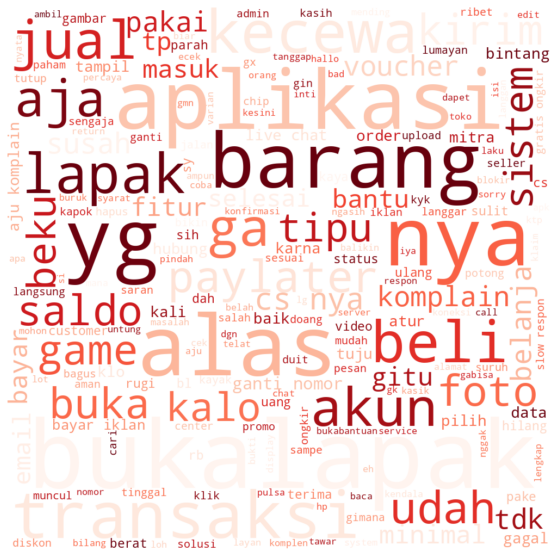

In [77]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

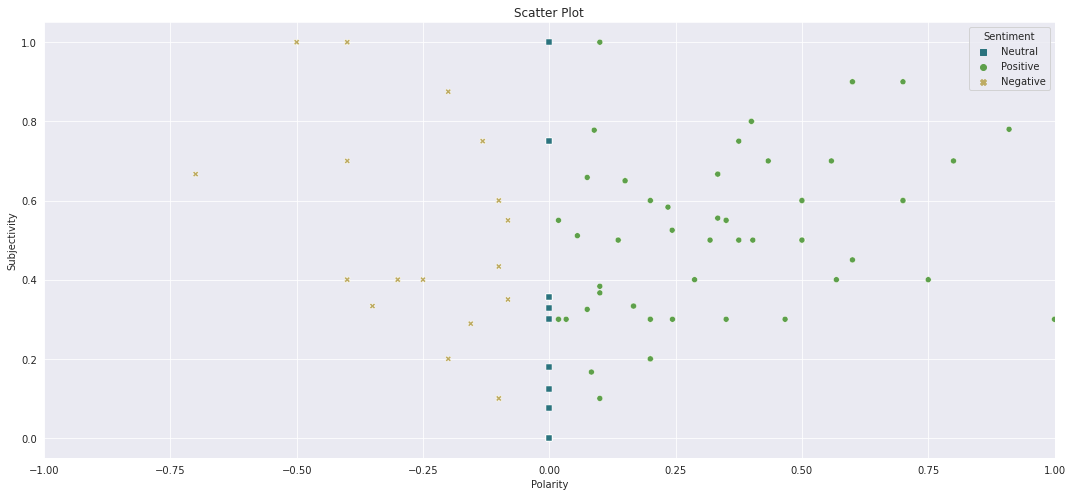

In [78]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

In [79]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [80]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-80-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [81]:
train_s1

,Nama pengguna,Ulasan_clean,Sentiment
3,Ryan Apriandi,aplikasi parah belanja cc pilih klik cicil tag...,Positive
10,CKN Official,tf uang virtual account nominal rb notifikasi ...,Positive
18,Ade Pramono,langgan setia bukalapaknamun tgn tipu ongkirja...,Positive
20,Tomy A,bintang yaa trimakasih bnyak ok smakin mantap ...,Positive
23,Ahmad Kasan,refund tanggal januari februari review edit re...,Positive
...,...,...,...
1243,Sian Hwa,bantu banget respon cepat pokok top bukalapak thx,Positive
1264,Compas Gnd,bayar payliter nya ditail klo orang yg paham g...,Positive
1268,firly sani,top up via atm dana tambah instant tolong bant...,Positive
1282,Solo Karya,foto bosbarng pasang mantap ok,Positive


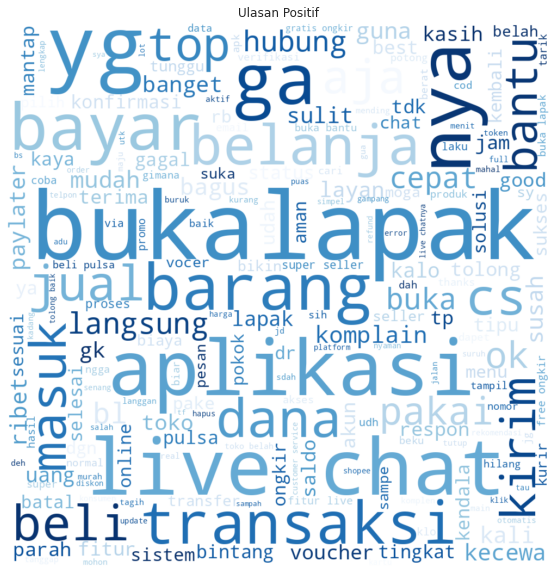

In [82]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [83]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-83-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [85]:
import numpy as np

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer             #menghitung n menjumlah kan dan menjumlah kan tf and n berdasarkan seluruh dokumen 
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [125]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1170, 3769)
(130, 3769)


In [126]:
X_train = X_train.toarray()

In [116]:
print(*X_train_counts, sep = "\n")

Output streaming akan dipotong hingga 5000 baris terakhir.
  (0, 167)	3
  (0, 1190)	1
  (0, 2414)	1
  (0, 1478)	2
  (0, 99)	1
  (0, 125)	1
  (0, 1025)	1
  (0, 3621)	1
  (0, 1961)	1
  (0, 3349)	1
  (0, 1550)	1
  (0, 464)	1
  (0, 2821)	1
  (0, 2245)	1
  (0, 2844)	1
  (0, 375)	1
  (0, 549)	1
  (0, 555)	1
  (0, 49)	1
  (0, 2948)	1
  (0, 926)	1
  (0, 1817)	1
  (0, 3042)	1
  (0, 1576)	1
  (0, 341)	1
  (0, 1164)	1
  (0, 1500)	1
  (0, 2137)	1
  (0, 549)	1
  (0, 1821)	1
  (0, 235)	1
  (0, 555)	1
  (0, 3273)	1
  (0, 605)	1
  (0, 2143)	1
  (0, 2755)	1
  (0, 2655)	1
  (0, 3165)	1
  (0, 863)	1
  (0, 359)	1
  (0, 2165)	1
  (0, 1821)	1
  (0, 3539)	3
  (0, 555)	1
  (0, 437)	1
  (0, 3273)	1
  (0, 49)	1
  (0, 1523)	1
  (0, 1629)	1
  (0, 305)	1
  (0, 2870)	1
  (0, 3545)	2
  (0, 2176)	1
  (0, 3327)	1
  (0, 436)	1
  (0, 3635)	1
  (0, 3673)	1
  (0, 440)	1
  (0, 1554)	1
  (0, 3202)	1
  (0, 138)	2
  (0, 1740)	1
  (0, 963)	1
  (0, 3640)	1
  (0, 3029)	1
  (0, 603)	1
  (0, 1071)	1
  (0, 1222)	1
  (0, 1169)	1
  (

In [127]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [128]:
X_test = X_test.toarray()

In [129]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [115]:
X_train_counts

<1170x3769 sparse matrix of type '<class 'numpy.int64'>'
	with 18387 stored elements in Compressed Sparse Row format>

In [130]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.3511191734215131}

In [94]:
nb = GaussianNB(var_smoothing=1.0) # untuk tidak overviting

In [95]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [ ]:
# define Naive Bayes classifier class
class NaiveBayes:
    def fit(self, X, y):
        # menghitung jumlah instance dan fitur
        n_samples, n_features = X.shape
        
        # menghitung jumlah instance per kelas
        self.class_counts = {}
        for label in np.unique(y):
            self.class_counts[label] = np.sum(y == label)
        
        # menghitung prior probability untuk setiap kelas
        self.priors = {}
        for label in self.class_counts:
            self.priors[label] = self.class_counts[label] / n_samples
        
        # menghitung conditional probability untuk setiap fitur
        self.likelihoods = {}
        for label in self.class_counts:
            label_samples = X[y == label]
            self.likelihoods[label] = {}
            for feature in range(n_features):
                feature_values = label_samples[:, feature]
                self.likelihoods[label][feature] = {}
                for value in np.unique(feature_values):
                    self.likelihoods[label][feature][value] = np.sum(feature_values == value) / self.class_counts[label]
    
    def predict(self, X):
        # menghitung posterior probability untuk setiap kelas
        posteriors = []
        for x in X:
            posterior = {}
            for label in self.class_counts:
                likelihood = 1
                for feature, value in enumerate(x):
                    if value in self.likelihoods[label][feature]:
                        likelihood *= self.likelihoods[label][feature][value]
                    else:
                        likelihood = 0
                        break
                posterior[label] = self.priors[label] * likelihood
            posteriors.append(posterior)
        
        # mengembalikan kelas dengan posterior probability tertinggi
        y_pred = []
        for posterior in posteriors:
            y_pred.append(max(posterior, key=posterior.get))
        return y_pred

# pre-processing data
# contoh: penggunaan CountVectorizer untuk mengubah teks ke dalam vektor frekuensi
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# train Naive Bayes model
nb = NaiveBayes()
nb.fit(X_train_counts.toarray(), y_train)

# make predictions on test set
y_pred = nb.predict(X_test_counts.toarray())

# evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

In [96]:
y_pred_nb = nb.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [98]:
print(y_train)

163      Neutral
770      Neutral
1053     Neutral
801      Neutral
698      Neutral
          ...   
109     Negative
773      Neutral
1277     Neutral
920      Neutral
919      Neutral
Name: Sentiment, Length: 1170, dtype: object


In [99]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

NameError: ignored

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

In [ ]:

print('Confusion matrix\n\n', cm)

In [ ]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [ ]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


In [ ]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [ ]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))